In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/dataset/test '
valid_path = '/content/drive/MyDrive/dataset/train'

In [ ]:
# the dataset train and test has 3 files
#nonzomato:(the other delivery boi)
#other:(contains dogs,cats,flowers dataset)
# zomato:(the zomato delivery)

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:
print(IMAGE_SIZE + [3]) 
#rgb channel of resnet50

[224, 224, 3]


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/dataset/train/*')
# 3 classes:['nonzomato','other','zomato]

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
#length of folder 3 as we use three outputs

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
#in last we see the layer has 3 outputs
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam', 
  metrics=['accuracy']  
) 

In [ ]:
#data augmentation to generate more image data nd we do it in train data only
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 574 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 226 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
) 

Epoch 1/50
13/18 [====================>.........] - ETA: 30s - loss: 5.4782 - accuracy: 0.3382

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/18 [==============================] - 194s 11s/step - loss: 5.0887 - accuracy: 0.3240 - val_loss: 1.0186 - val_accuracy: 0.5044
Epoch 2/50
18/18 [==============================] - 144s 8s/step - loss: 1.7420 - accuracy: 0.4547 - val_loss: 1.5227 - val_accuracy: 0.4292
Epoch 3/50
18/18 [==============================] - 150s 8s/step - loss: 1.2007 - accuracy: 0.4843 - val_loss: 0.9323 - val_accuracy: 0.5752
Epoch 4/50
18/18 [==============================] - 144s 8s/step - loss: 0.8947 - accuracy: 0.5784 - val_loss: 1.0422 - val_accuracy: 0.4690
Epoch 5/50
18/18 [==============================] - 144s 8s/step - loss: 1.0483 - accuracy: 0.5087 - val_loss: 0.9424 - val_accuracy: 0.4912
Epoch 6/50
18/18 [==============================] - 149s 8s/step - loss: 0.9591 - accuracy: 0.5366 - val_loss: 0.6623 - val_accuracy: 0.7212
Epoch 7/50
18/18 [==============================] - 142s 8s/step - loss: 0.8867 - accuracy: 0.5923 - val_loss: 1.5159 - val_accuracy: 0.4425
Epoch 8/50
18/18 [=====

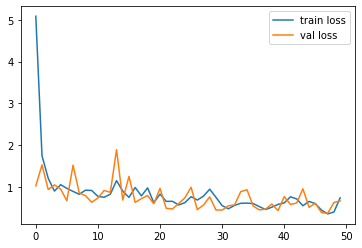

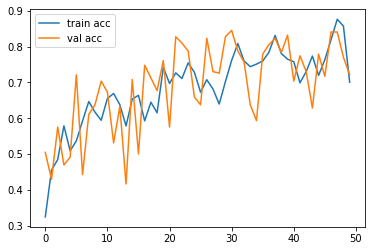

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
#prediction of test data
y_pred = model.predict(test_set)

8/8 [==============================] - 39s 5s/step


In [ ]:
#output for all the images in test data
y_pred

array([[9.81517553e-01, 7.37096695e-03, 1.11115919e-02],
       [3.96760665e-02, 2.71730591e-02, 9.33150887e-01],
       [9.99829531e-01, 1.45852580e-04, 2.45461706e-05],
       [3.62601801e-04, 5.10451559e-04, 9.99126911e-01],
       [3.52777453e-04, 9.94509578e-01, 5.13762748e-03],
       [1.04621261e-01, 8.38328540e-01, 5.70500717e-02],
       [2.49565005e-01, 5.91809803e-04, 7.49843121e-01],
       [2.83444732e-01, 3.50384682e-01, 3.66170496e-01],
       [7.52716720e-01, 1.48709178e-01, 9.85740647e-02],
       [9.11072493e-01, 5.41822333e-03, 8.35092217e-02],
       [3.08480322e-01, 4.65580404e-01, 2.25939408e-01],
       [2.37281827e-04, 9.97887909e-01, 1.87473791e-03],
       [7.17398226e-01, 2.49406055e-01, 3.31956595e-02],
       [5.73563157e-05, 9.97219205e-01, 2.72350502e-03],
       [2.34354839e-01, 3.01414102e-01, 4.64231014e-01],
       [8.23236585e-01, 6.76010400e-02, 1.09162427e-01],
       [1.32091753e-02, 1.45368569e-03, 9.85337257e-01],
       [1.83728838e-03, 9.95530

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2,
       0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2,
       1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0,
       1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0,
       0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2,
       0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2,
       2, 0, 2, 0, 1, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
#TESTING BY TAKING A IMAGE OF ZOMATO BOI [it should give 2 value in result if true]
img=image.load_img('/content/drive/MyDrive/dataset/train/zomato/image11.jpeg',target_size=(224,224))

In [ ]:
#saving image in array
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 222ms/step


array([[1.7131926e-01, 1.8221331e-10, 8.2868069e-01]], dtype=float32)

In [ ]:

a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 207ms/step


In [ ]:
a
#we give zomato pic and gets its label 2 which is correct

array([2])